In [69]:
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import MyPyTable
importlib.reload(MyPyTable)
from MyPyTable import MyPyTable

import utils
importlib.reload(utils)
import numpy as np
from classifier import MyKNeighborsClassifier

# python virtual environments!!!


# Base Dataset

Loading and formatting the initial titanic dataset. Using CPSC 322 MyPyTable that I wrote the functions for.

In [99]:
titanic_intro = MyPyTable()
titanic_intro.load_from_file("input_data/Titanic-Dataset.csv")

feature_names = ['Embarked Q', 'Embarked C', 'Embarked S', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
# titanic_intro.remove_rows_with_missing_values()
# titanic_intro.pretty_print()


In [71]:
total = 0
length = 0

for row in titanic_intro.data:
    if row[5] != '':
        if int(row[5]) > 0:
            total += int(row[5])
            length += 1

print(int(total/length))

29


# Visualizations  
Initial visualizations of the unprocessed dataset

In [72]:
classes = titanic_intro.get_column("Pclass")
unique_classes = []
for value in classes:
    if value in unique_classes:
        pass
    else:
        unique_classes.append(value)
# print(unique_classes)

unique_set = set(classes)
# print(unique_set)

#### Bar Chart!

In [73]:
survived = titanic_intro.get_column("Survived")
passender_id = titanic_intro.get_column("PassengerId")

# print(age)


Text(0.5, 0, 'Survival Status')

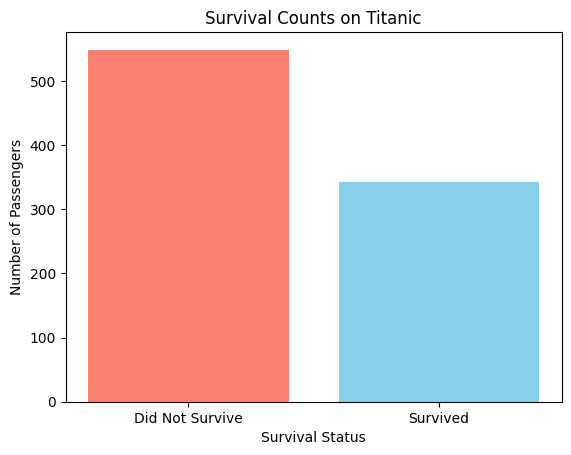

In [74]:
# this took way too long to fix...
survived_counts = pd.Series(titanic_intro.get_column("Survived")).value_counts()

# plot the bar chart
plt.bar(['Did Not Survive', 'Survived'], survived_counts, color=['salmon', 'skyblue'])

# making the plot pretty
plt.title("Survival Counts on Titanic")
plt.ylabel("Number of Passengers")
plt.xlabel("Survival Status")
# plt.show()


# Summary Statistics  
For each column, the average, median, mode are computed and displayed for continuous values.

* Pclass, Age and Fare...
* correlation matrix
* feature selection

1. split
2. statistics
    * mean
    * median 
    * stdev
3. compare to whole dataset
keep code arbitrary

separate into train testing
use covariance on numerical features (come up with a formula)
try to determine what city was embarked from
in the testing set try to predict embarked
transform data, split, choose best features and evaluate accuracy
take the highest probability and ask if that is the actual port

# Default Values  

Survived: 0  
Class: 3  
Sex: 0  
Age: int(col.avg)  
SibSp: 0  
Parch: 0  
Fare: col.avg  
Embarked: Drop row if NA  

# Finding Covariance

In [75]:
# titanic_intro.remove_rows_with_missing_values()
# titanic_intro.pretty_print()

## Adjusting Default Values

In [76]:
# Mapping each port to an integer
embark_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Convert embarked values into separate binary lists
embark_S = [(1 if row[11] == 'S' else 0) for row in titanic_intro.data]
embark_C = [(1 if row[11] == 'C' else 0) for row in titanic_intro.data]
embark_Q = [(1 if row[11] == 'Q' else 0) for row in titanic_intro.data]

# Convert sex to int
sex_mapping = {'female': 0, 'male': 1}
numeric_sex = [sex_mapping[row[4]] for row in titanic_intro.data]

covariance_table = [
    [embark_Q[i], embark_C[i], embark_S[i], row[1], row[2], numeric_sex[i],
     row[5], row[6], row[7], row[9]] for i, row in enumerate(titanic_intro.data)
]
print(covariance_table)

# covariance_table = np.array(covariance_table, dtype=np.float64)

# Compute covariance
# covariance = np.cov(covariance_table, rowvar=False)
# print(covariance)
print(sum(embark_Q))
print(sum(embark_C))
print(sum(embark_S))

[[0, 0, 1, 0.0, 3.0, 1, 22.0, 1.0, 0.0, 7.25], [0, 1, 0, 1.0, 1.0, 0, 38.0, 1.0, 0.0, 71.2833], [0, 0, 1, 1.0, 3.0, 0, 26.0, 0.0, 0.0, 7.925], [0, 0, 1, 1.0, 1.0, 0, 35.0, 1.0, 0.0, 53.1], [0, 0, 1, 0.0, 3.0, 1, 35.0, 0.0, 0.0, 8.05], [1, 0, 0, 0.0, 3.0, 1, '', 0.0, 0.0, 8.4583], [0, 0, 1, 0.0, 1.0, 1, 54.0, 0.0, 0.0, 51.8625], [0, 0, 1, 0.0, 3.0, 1, 2.0, 3.0, 1.0, 21.075], [0, 0, 1, 1.0, 3.0, 0, 27.0, 0.0, 2.0, 11.1333], [0, 1, 0, 1.0, 2.0, 0, 14.0, 1.0, 0.0, 30.0708], [0, 0, 1, 1.0, 3.0, 0, 4.0, 1.0, 1.0, 16.7], [0, 0, 1, 1.0, 1.0, 0, 58.0, 0.0, 0.0, 26.55], [0, 0, 1, 0.0, 3.0, 1, 20.0, 0.0, 0.0, 8.05], [0, 0, 1, 0.0, 3.0, 1, 39.0, 1.0, 5.0, 31.275], [0, 0, 1, 0.0, 3.0, 0, 14.0, 0.0, 0.0, 7.8542], [0, 0, 1, 1.0, 2.0, 0, 55.0, 0.0, 0.0, 16.0], [1, 0, 0, 0.0, 3.0, 1, 2.0, 4.0, 1.0, 29.125], [0, 0, 1, 1.0, 2.0, 1, '', 0.0, 0.0, 13.0], [0, 0, 1, 0.0, 3.0, 0, 31.0, 1.0, 0.0, 18.0], [0, 1, 0, 1.0, 3.0, 0, '', 0.0, 0.0, 7.225], [0, 0, 1, 0.0, 2.0, 1, 35.0, 0.0, 0.0, 26.0], [0, 0, 1, 1.0, 2.

In [77]:
# Initialize counters outside the loop
final_na_count = 0
row_count = 0

# survived = no
# pclass = 3
# sex = female
# sibsp = none
# parch = none 

# Columns to fill and their default values
default_values = {3: 0, 4: 3, 5: 0, 7: 0, 8: 0}

# Process data for default values
for row in covariance_table:
    # Check if any embark value is na
    if any(row[i] == '' for i in [0, 1, 2]):
        final_na_count += 1
    
    for col, default in default_values.items():
        if row[col] == '':
            row[col] = default
    
    row_count += 1


print("Missing rows (NA count):", final_na_count)
print("Total rows processed:", row_count)

# print(covariance_table)


Missing rows (NA count): 0
Total rows processed: 891


In [78]:
# Function to compute column-wise averages, ignoring empty strings
def column_average(table, col_index, as_int=False):
    values = [float(row[col_index]) for row in table if row[col_index] != '']
    avg = sum(values) / len(values) if values else 0
    return int(avg) if as_int else avg

# Compute column averages
# Age: int(col.avg)   
age_avg = column_average(covariance_table, 6, as_int=True)
# Fare: col.avg 
fare_avg = column_average(covariance_table, 9)

# Replace missing values
for row in covariance_table:
    if row[6] == '':
        row[6] = age_avg
    if row[9] == '':
        row[9] = fare_avg

missing_value_count = 0

# Replace missing values and count na values
for row in covariance_table:
    for col in range(len(row)):
        if row[col] == '':
            missing_value_count += 1

print(f"Total missing values: {missing_value_count}")

# print(covariance_table)

Total missing values: 0


In [79]:
# Compute the sum of column 0
embark_Q_sum = sum(row[0] for row in covariance_table if row[0] != '')

print(f"Sum of Embark Q: {embark_Q_sum}")


Sum of Embark Q: 77


In [80]:
# Separate X and y datasets
# X = [[row[2], row[9]]
#     for i, row in enumerate(titanic_intro.data)
#     ]

# Extract X_all (all features excluding embark_Q, embark_C, embark_S)
X_all = [row[3:] for row in covariance_table]

# Extract y (target: embark_Q, embark_C, embark_S)
y = [row[:3] for row in covariance_table]


In [85]:
# Split into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = utils.train_test_split(X_all, y, 0.5, 10)
print(len(X_train_1))
print(len(X_test_1))
# print(y_train_1)
# print(X_train_1)

# Compute the sum of column 0
embark_Q_sum1 = sum(row[0] for row in y_train_1)

print(f"Sum of Embark Q: {embark_Q_sum1}")
# X_train, X_test, y_train, y_test = utils.train_test_split(X, y, 0.5, 100)

445
446
Sum of Embark Q: 41


In [91]:
# Combine y_train_1 and X_train_1 into the required shape
covariance_table_1 = [y_row + x_row for y_row, x_row in zip(y_train_1, X_train_1)]

# print(covariance_table_1)

covariance = np.cov(covariance_table_1, rowvar=False)

In [92]:
# Find columns with zero variance
# zero_variance_cols = np.where(np.std(covariance_table_1, axis=0) == 0)[0]
# print("Columns with zero variance:", zero_variance_cols)

# Remove zero-variance columns if any
# covariance_table_1 = covariance_table_1[:, np.std(covariance_table_1, axis=0) != 0]


In [94]:
# print("Data type of covariance_table_1:", covariance_table_1.dtype)

# Ensure everything is float
# covariance_table_1 = covariance_table_1.astype(float)

# for row in covariance_table_1:
#     if row[0] == 1:
#         print(row)
#     else: 
#         print("none")

In [95]:
# Split into train and test sets
# X_train, X_test, y_train, y_test = utils.train_test_split(X, y, 0.5, 100)

In [97]:
correlation = np.corrcoef(covariance_table_1, rowvar=False)
print("Correlation Matrix:\n", correlation)

print("Unique values in embark_Q:", np.unique(embark_Q))
print("Variance of embark_Q:", np.var(embark_Q))

# Ensure embark_Q has more than one unique value
if np.var(embark_Q) == 0:
    print("Zero variance detected in embark_Q! Correlation cannot be computed.")


Correlation Matrix:
 [[ 1.         -0.15366936 -0.50409564  0.01433301  0.21410593 -0.11124909
  -0.01335534 -0.03680543 -0.08434959 -0.139254  ]
 [-0.15366936  1.         -0.76330436  0.11954792 -0.26428145 -0.02330199
   0.0615117  -0.0488521  -0.01154982  0.24617495]
 [-0.50409564 -0.76330436  1.         -0.12579672  0.10834928  0.10511859
  -0.06081961  0.07086694  0.0687261  -0.13925291]
 [ 0.01433301  0.11954792 -0.12579672  1.         -0.31249498 -0.57034325
  -0.09295948 -0.03335574  0.13714079  0.27020143]
 [ 0.21410593 -0.26428145  0.10834928 -0.31249498  1.          0.13477613
  -0.28226713  0.07359189 -0.01346803 -0.63052714]
 [-0.11124909 -0.02330199  0.10511859 -0.57034325  0.13477613  1.
   0.03709689 -0.05469986 -0.24168455 -0.18276697]
 [-0.01335534  0.0615117  -0.06081961 -0.09295948 -0.28226713  0.03709689
   1.         -0.24203529 -0.19817237  0.05528535]
 [-0.03680543 -0.0488521   0.07086694 -0.03335574  0.07359189 -0.05469986
  -0.24203529  1.          0.36492967 

# Plotting the Covariance of Embarked Passengers

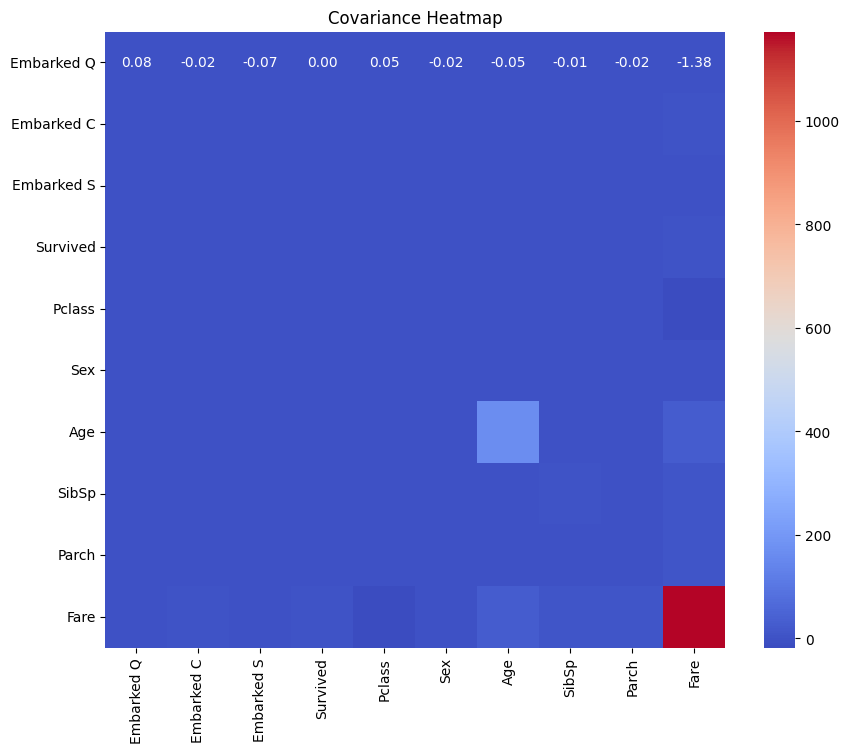

In [101]:
# plot the data
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names)

# Title and labels
plt.title("Covariance Heatmap")
plt.show()

# Correlation

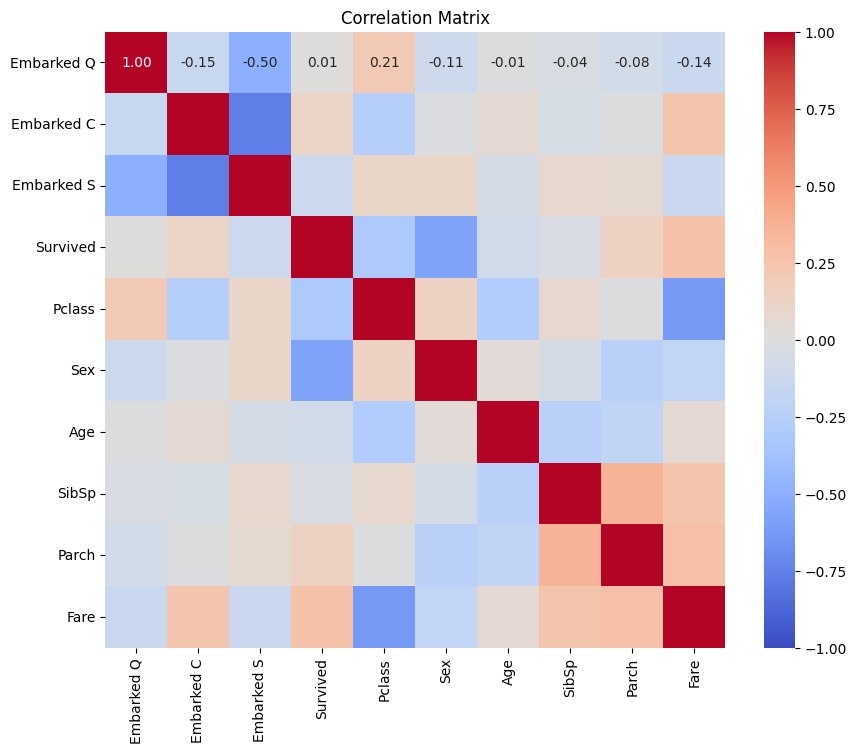

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Splitting the Dataset

In [ ]:
# # Separate X and y datasets
# X = [[row[2], row[9]]
#     for i, row in enumerate(titanic_intro.data)
#     ]
# y = [numeric_embark[i] for i in range(len(titanic_intro.data))]

# print(X)
# print()
# print(y)
# print()
# print(len(titanic_intro.data))

# Use Classifier (KNN) to Predict Embarked Value

In [ ]:
knn = MyKNeighborsClassifier(2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = utils.accuracy_score(y_test, y_pred_knn)

print(knn_accuracy)

TypeError: unhashable type: 'numpy.ndarray'